In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv("C:/Users/yueyu/Dropbox/PC/Desktop/Capstone/DF2.csv.xls")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           15420 non-null  int64  
 1   FraudFound_P         15420 non-null  int64  
 2   Rural                15420 non-null  float64
 3   Male                 15420 non-null  float64
 4   Policy Holder Fault  15420 non-null  float64
 5   Sedan                15420 non-null  float64
 6   Frist Claim          15420 non-null  float64
 7   Collision Coverage   15420 non-null  float64
 8   VP_69000             15420 non-null  float64
 9   VP_20000             15420 non-null  float64
 10  Under 35             15420 non-null  float64
dtypes: float64(9), int64(2)
memory usage: 1.3 MB


In [3]:
x = data[['Rural', 'Male', 'Policy Holder Fault', 'Sedan', 'Frist Claim', 'Collision Coverage', 'VP_69000', 'VP_20000', 'Under 35']]
y = data[['FraudFound_P']]

In [4]:
#Partition the dataset as training set and validation set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( x, y, test_size=0.3, random_state=0)

In [5]:
train=pd.concat([Y_train,X_train],axis=1)
test=pd.concat([Y_test,X_test],axis=1)

In [6]:
pip install -U imbalanced-learn 

Note: you may need to restart the kernel to use updated packages.


In [7]:
#Balance training set
from imblearn import over_sampling, under_sampling

In [8]:
X = train[['Rural', 'Male', 'Policy Holder Fault', 'Sedan', 'Frist Claim', 'Collision Coverage', 'VP_69000', 'VP_20000', 'Under 35']]
y = train[['FraudFound_P']]

In [9]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state = 0)
X_resampled, y_resampled = rus.fit_resample(X,y)
X_resampled

,Rural,Male,Policy Holder Fault,Sedan,Frist Claim,Collision Coverage,VP_69000,VP_20000,Under 35
0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1289,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1290,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1291,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
1292,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0


In [10]:
x_train = X_resampled[['Rural','Male', 'Policy Holder Fault', 'Sedan', 'Frist Claim','Collision Coverage','VP_69000', 'VP_20000', 'Under 35']]
y_train = y_resampled[['FraudFound_P']]
x_test = test[['Rural','Male', 'Policy Holder Fault', 'Sedan', 'Frist Claim','Collision Coverage','VP_69000', 'VP_20000', 'Under 35']]
y_test = test[['FraudFound_P']]

In [11]:
#using simple decision tree classifier
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth = 5) #Build
dt_clf.fit(x_train, y_train) # Train
dt_clf.score(x_test, y_test) # make prediction

0.6028966709900562

In [12]:
#see tge confusion matrix
y_pred = dt_clf.predict(x_test)
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[2532, 1818],
       [  19,  257]], dtype=int64)

In [13]:
#perform classficiation using random forest classifier
from sklearn import ensemble

rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train.values.ravel())
rf_clf.score(x_test, y_test)

0.6007349762213575

In [15]:
#Perfomr classification using gradient boosting classifier
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train, y_train.values.ravel())
gb_clf.score(x_test, y_test)

0.6013834846519671

In [27]:
#let's tune this Gradient booster
gb_clf = ensemble.GradientBoostingClassifier(n_estimators=200)
gb_clf.fit(x_train, y_train.values.ravel())
gb_clf.score(x_test, y_test)

0.6035451794206658

In [17]:
#build k_nearest neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=10)
knn_clf.fit(x_train, y_train.values.ravel())
knn_clf.score(x_test, y_test)

0.8871595330739299

In [18]:
#build a logistoc Regression classifier
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train.values.ravel())
lr_clf.score(x_test, y_test)

0.6044098573281452

In [19]:
#build an SVM classifier
from sklearn.svm import SVC
sv_clf = SVC(probability = True)
sv_clf.fit(x_train, y_train.values.ravel())
sv_clf.score(x_test, y_test)

0.6044098573281452

In [20]:
#build a Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train, y_train.values.ravel())
nb_clf.score(x_test, y_test)

0.6078685689580631

In [21]:
#Prediction Probabilities
r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_clf.predict_proba(x_test)
rf_probs = rf_clf.predict_proba(x_test)
gb_probs = gb_clf.predict_proba(x_test)
knn_probs = knn_clf.predict_proba(x_test)
lr_probs = lr_clf.predict_proba(x_test)
sv_probs = sv_clf.predict_proba(x_test)
nb_probs = nb_clf.predict_proba(x_test)

In [22]:
#probabilities for the positive outcome is kept
dt_probs = dt_probs[:,1]
rf_probs = rf_probs[:,1]
gb_probs = gb_probs[:,1]
knn_probs = knn_probs[:,1]
lr_probs = lr_probs[:,1]
sv_probs = sv_probs[:,1]
nb_probs = nb_probs[:,1]

In [23]:
# Compute the AUROC Values
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test,r_probs)
rf_auc = roc_auc_score(y_test,rf_probs)
dt_auc = roc_auc_score(y_test,dt_probs)
gb_auc = roc_auc_score(y_test,gb_probs)
knn_auc = roc_auc_score(y_test,knn_probs)
lr_auc = roc_auc_score(y_test,lr_probs)
sv_auc = roc_auc_score(y_test,sv_probs)
nb_auc = roc_auc_score(y_test,nb_probs)

In [24]:
#Displare the AUROC scores
print("Random Predicition: AUROC = %.3f" %(r_auc))
print("Random Forest: AUROC = %.3f" %(rf_auc))
print("Decistion Tress Predicition: AUROC = %.3f" %(dt_auc))
print("Gradient Boosting Predicition: AUROC = %.3f" %(gb_auc))
print("KNearest Neighbors Prediction: AUROC = %.3f" %(knn_auc))
print("Logistic Regression: AUROC = %.3f" %(lr_auc))
print("Support Vector Machine: AUROC = %.3f" %(sv_auc))
print("Naive Bayes: AUROC = %.3f" %(nb_auc))

Random Predicition: AUROC = 0.500
Random Forest: AUROC = 0.783
Decistion Tress Predicition: AUROC = 0.774
Gradient Boosting Predicition: AUROC = 0.781
KNearest Neighbors Prediction: AUROC = 0.603
Logistic Regression: AUROC = 0.779
Support Vector Machine: AUROC = 0.754
Naive Bayes: AUROC = 0.772


In [25]:
#Calculate the ROC Curve
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
sv_fpr, sv_tpr, _ = roc_curve(y_test, sv_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

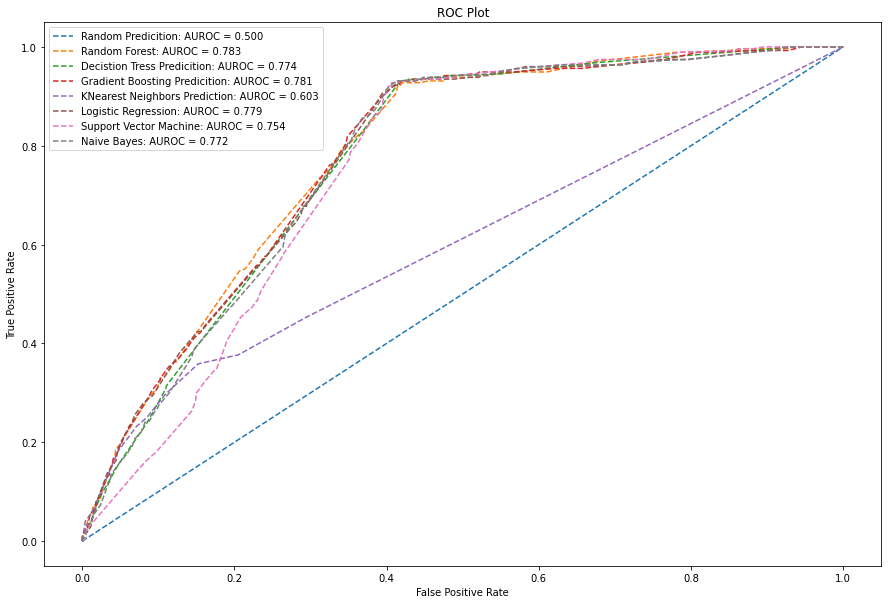

In [26]:
# Plot the ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(r_fpr, r_tpr, linestyle = '--', label = "Random Predicition: AUROC = %.3f" %(r_auc))
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label = "Random Forest: AUROC = %.3f" %(rf_auc))
plt.plot(dt_fpr, dt_tpr, linestyle = '--', label = "Decistion Tress Predicition: AUROC = %.3f" %(dt_auc))
plt.plot(gb_fpr, gb_tpr, linestyle = '--', label = "Gradient Boosting Predicition: AUROC = %.3f" %(gb_auc))
plt.plot(knn_fpr, knn_tpr, linestyle = '--', label = "KNearest Neighbors Prediction: AUROC = %.3f" %(knn_auc))
plt.plot(lr_fpr, lr_tpr, linestyle = '--', label = "Logistic Regression: AUROC = %.3f" %(lr_auc))
plt.plot(sv_fpr, sv_tpr, linestyle = '--', label = "Support Vector Machine: AUROC = %.3f" %(sv_auc))
plt.plot(nb_fpr, nb_tpr, linestyle = '--', label = "Naive Bayes: AUROC = %.3f" %(nb_auc))

#Title
plt.title("ROC Plot")

#Axis Lables
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Show legend
plt.legend()
plt.show()